# Loan Classification based on the likelihood of loan repayment using Logistic Regression

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

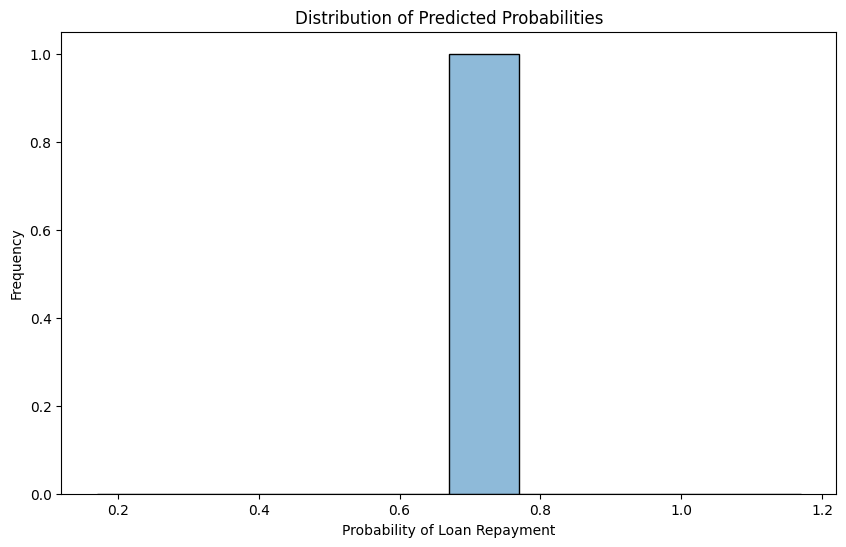

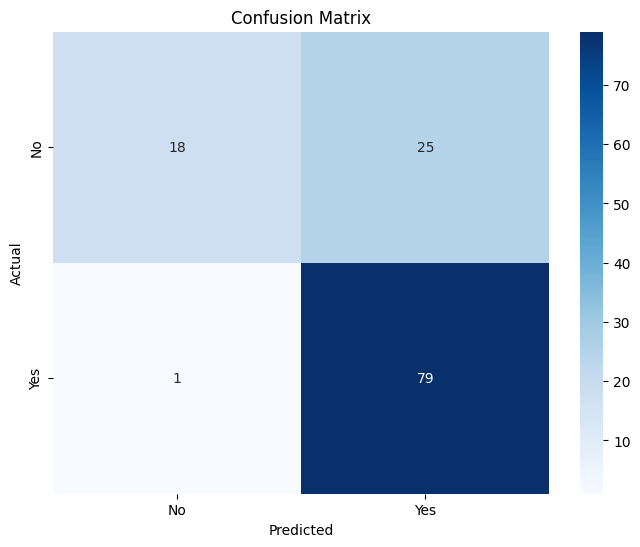

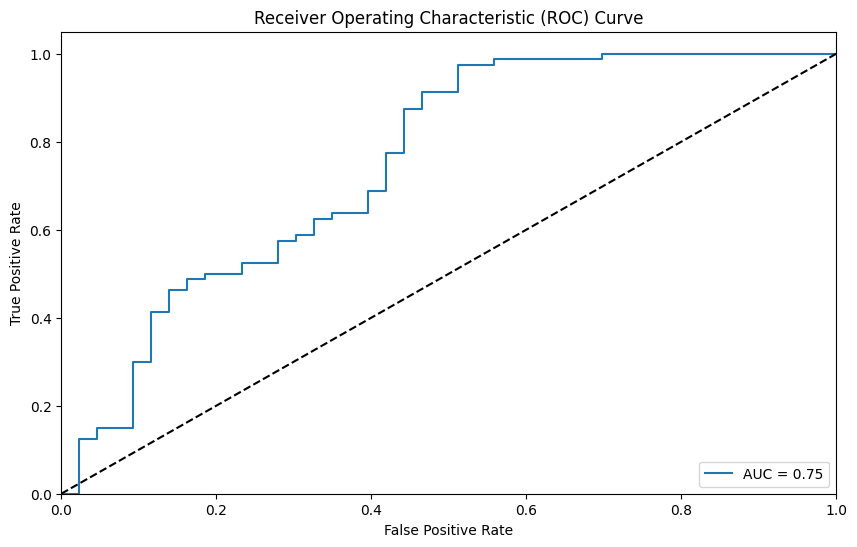

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162             360.0   
1               4583             1508.0  128.000000             360.0   
2               3000                0.0   66.000000             360.0   
3               2583             2358.0  120.000000             360.0   
4               6000                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609             2900                0.0   71.000000             360.0   
610             4106                0.0   40.000000             180.0   
611             8072              240.0  253.000000             360.0   
612             7583                0.0  187.000000             360.0   
613             4583                0.0  133.000000             360.0   

     Credit_History  Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0               1.0            1         True  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer

df = pd.read_csv('loan_data.csv')

print(df.head())

df.drop('Loan_ID', axis=1, inplace=True)

imputer = SimpleImputer(strategy='mean')
df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = imputer.fit_transform(df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Convert Loan_Status to numerical values
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

def predict_loan_repayment(new_data):
    new_data[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = imputer.transform(new_data[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
    new_data = pd.get_dummies(new_data, columns=categorical_columns, drop_first=True)
    
    missing_cols = set(X.columns) - set(new_data.columns)
    for col in missing_cols:
        new_data[col] = 0
    new_data = new_data[X.columns]
    
    new_data = scaler.transform(new_data)
    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]
    return predictions, probabilities

new_loan_data = pd.DataFrame({
    'Gender': ['Male'],
    'Married': ['Yes'],
    'Dependents': ['1'],
    'Education': ['Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [2000],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': ['Urban']
})

predictions, probabilities = predict_loan_repayment(new_loan_data)
print("Predictions:", predictions)
print("Probabilities:", probabilities)

# Visualize the results

# Plot the distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(probabilities, bins=10, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability of Loan Repayment')
plt.ylabel('Frequency')
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
# Print the dataset used
print(df)
